In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy as scp
from scipy.stats import normaltest, anderson, yeojohnson
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    GridSearchCV,
    LearningCurveDisplay,
)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    KBinsDiscretizer,
    PowerTransformer,
)
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor,
    RandomForestClassifier,
    AdaBoostClassifier,
)
import category_encoders as ce
from sklearn.pipeline import Pipeline

# from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

spotify_dark_green = "#1db954"
spotify_light_green = "#1ed760"
spotify_df = pd.read_csv("../data/spotify_data.csv")
spotify_df.head(10)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [6]:
spotify_df.shape

(114000, 21)

In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [8]:
spotify_df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
spotify_df.nunique()

track_id            89741
artists             31437
album_name          46589
track_name          73608
popularity            101
duration_ms         50697
explicit                2
danceability         1174
energy               2083
key                    12
loudness            19480
mode                    2
speechiness          1489
acousticness         5061
instrumentalness     5346
liveness             1722
valence              1790
tempo               45653
time_signature          5
track_genre           114
dtype: int64

In [10]:
discrete_features = [
    feat for feat in spotify_df.columns if spotify_df[feat].nunique() < 50
]
numerical_features = [
    feat
    for feat in spotify_df.columns
    if spotify_df[feat].dtype != "object"
    and feat != "popularity"
    and feat not in discrete_features
]
categorical_features = [
    feat
    for feat in spotify_df.columns
    if feat not in numerical_features
    and feat not in discrete_features
    and feat != "popularity"
]
target = "popularity"
print(numerical_features, len(numerical_features))
print(discrete_features, len(discrete_features))
print(categorical_features, len(categorical_features))

['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] 10
['explicit', 'key', 'mode', 'time_signature'] 4
['track_id', 'artists', 'album_name', 'track_name', 'track_genre'] 5


In [11]:
spotify_df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [12]:
spotify_df.dropna(inplace=True)

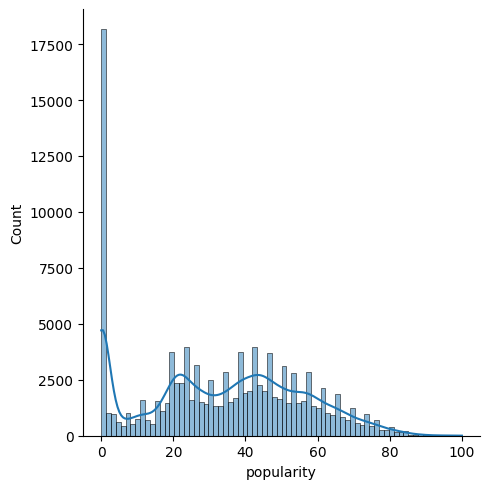

In [13]:
# https://en.wikipedia.org/wiki/Kernel_density_estimation
sns.displot(spotify_df[target], kde=True)

In [14]:
print(
    "Skew is a quantification of how much a distribution is pushed left or right - a measure of assymetry in the distribution"
)
print(f"Skew of data: {spotify_df[target].skew()}")
print(
    "Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality"
)
print(f"Kurtosis of data: {spotify_df[target].kurtosis()}")

Skew is a quantification of how much a distribution is pushed left or right - a measure of assymetry in the distribution
Skew of data: 0.046393480720723884
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality
Kurtosis of data: -0.9277384459164684


In [15]:
# https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
# https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test
print(
    "D'Agostino's K-squared test leverages skew and kurtosis to derive a probability that the distribution is normally distributed."
)
spotify_non_zero_pop = spotify_df[spotify_df[target] > 0]
stat, p = normaltest(spotify_non_zero_pop[target])
print(f"Probability that this data is normally distributed: {p}\n")

# https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test
distributions = [
    "norm",
    "expon",
    "logistic",
    "gumbel",
    "gumbel_l",
    "gumbel_r",
    "extreme1",
]
for dist in distributions:
    result = anderson(np.log(spotify_non_zero_pop[target]), dist=dist)
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print(f"{sl:.3f}: {cv:.3f}, data looks {dist} (fail to reject H0)")
        else:
            print(f"{sl:.3f}: {cv:.3f}, data does not look {dist} (reject H0)")

D'Agostino's K-squared test leverages skew and kurtosis to derive a probability that the distribution is normally distributed.
Probability that this data is normally distributed: 0.0

15.000: 0.576, data does not look norm (reject H0)
10.000: 0.656, data does not look norm (reject H0)
5.000: 0.787, data does not look norm (reject H0)
2.500: 0.918, data does not look norm (reject H0)
1.000: 1.092, data does not look norm (reject H0)
15.000: 0.922, data does not look expon (reject H0)
10.000: 1.078, data does not look expon (reject H0)
5.000: 1.341, data does not look expon (reject H0)
2.500: 1.606, data does not look expon (reject H0)
1.000: 1.957, data does not look expon (reject H0)
25.000: 0.426, data does not look logistic (reject H0)
10.000: 0.563, data does not look logistic (reject H0)
5.000: 0.660, data does not look logistic (reject H0)
2.500: 0.769, data does not look logistic (reject H0)
1.000: 0.906, data does not look logistic (reject H0)
0.500: 1.010, data does not look lo

<Axes: >

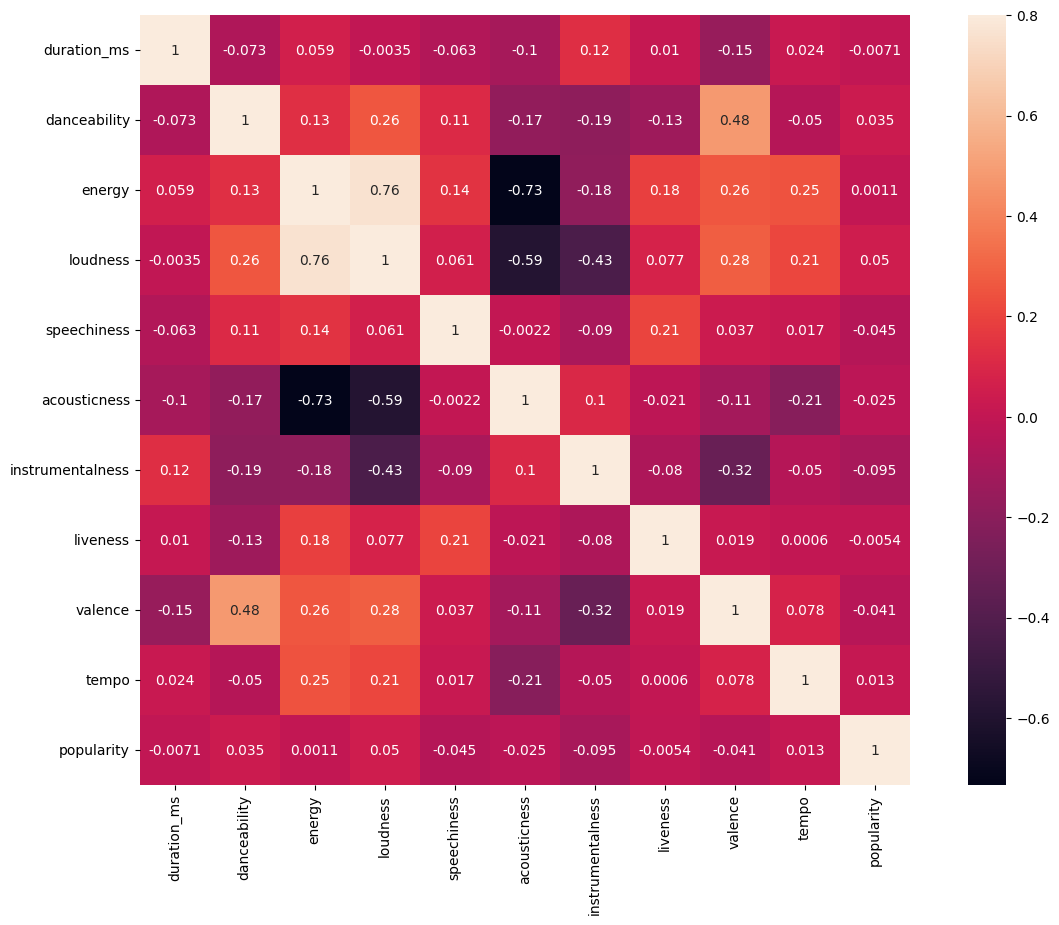

In [16]:
corrmat = spotify_df[numerical_features + [target]].corr()
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)

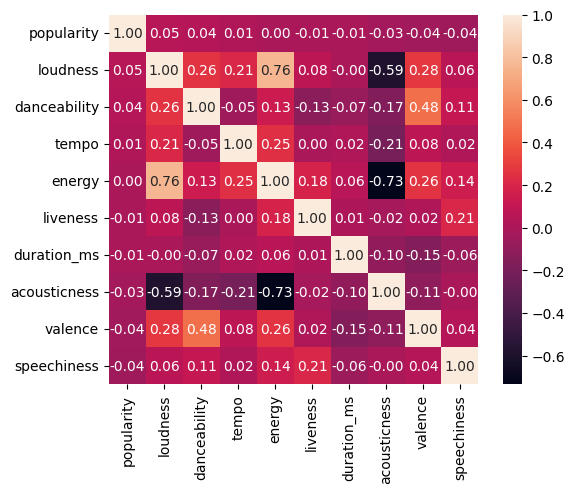

In [17]:
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, target)[target].index
cm = spotify_df[cols].corr(numeric_only=False)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

In [18]:
spotify_df[numerical_features].describe()

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,2.280312e+05,0.566801,0.641383,-8.258950,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695
std,1.072961e+05,0.173543,0.251530,5.029357,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290
min,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.740660e+05,0.456000,0.472000,-10.013000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500
50%,2.129060e+05,0.580000,0.685000,-7.004000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000
75%,2.615060e+05,0.695000,0.854000,-5.003000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000
max,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


In [19]:
spotify_df[categorical_features].describe()

,track_id,artists,album_name,track_name,track_genre
count,113999,113999,113999,113999,113999
unique,89740,31437,46589,73608,114
top,6S3JlDAGk3uu3NtZbPnuhS,The Beatles,Alternative Christmas 2022,Run Rudolph Run,acoustic
freq,9,279,195,151,1000


In [20]:
suspect_categorical_features = ["track_id", "track_name", "album_name"]

In [21]:
spotify_df[discrete_features].describe()

,key,mode,time_signature
count,113999.000000,113999.000000,113999.000000
mean,5.309126,0.637558,3.904034
std,3.559999,0.480708,0.432623
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,4.000000
50%,5.000000,1.000000,4.000000
75%,8.000000,1.000000,4.000000
max,11.000000,1.000000,5.000000


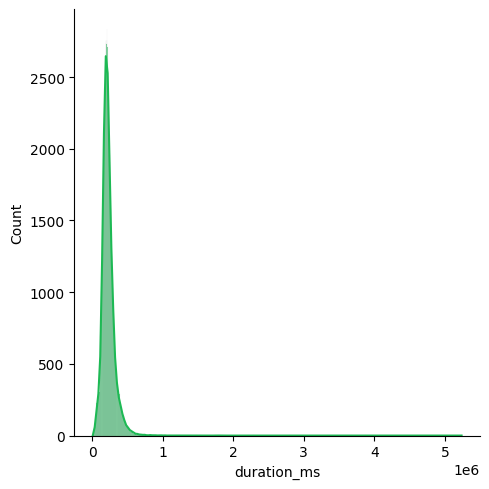

Kurtosis of duration_ms: 354.97662679677444 leptokurtic
Skew of duration_ms: 11.195825995953086 (highly skewed)
Probability that duration_ms is normally distributed: 0.0



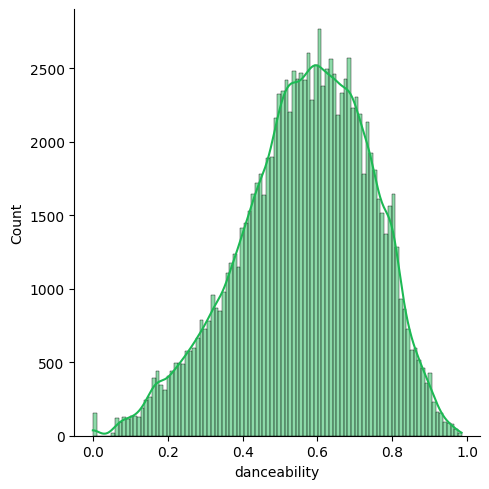

Kurtosis of danceability: -0.1845149172625713 
Skew of danceability: -0.3995051370129279 (approximately symmetric)
Probability that danceability is normally distributed: 0.0



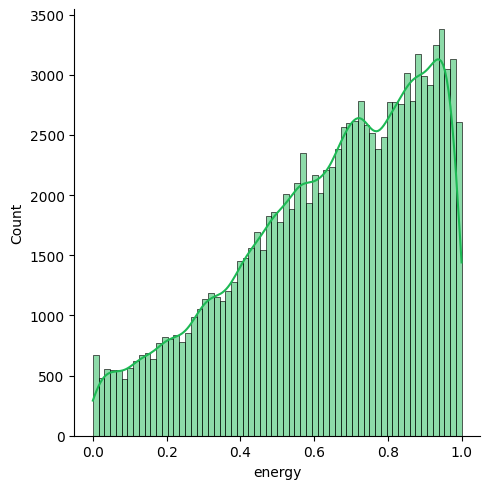

Kurtosis of energy: -0.5257253537634998 
Skew of energy: -0.5970052205033176 (moderately skewed)
Probability that energy is normally distributed: 0.0



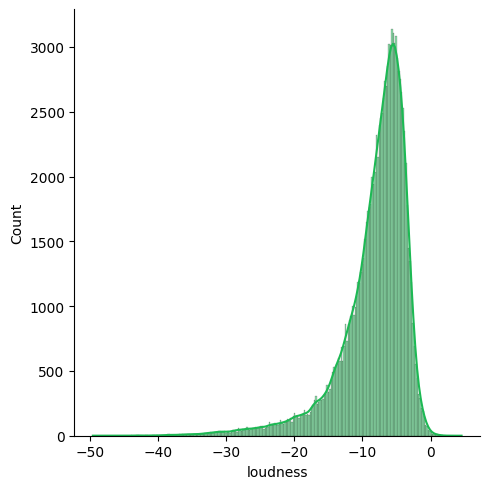

Kurtosis of loudness: 5.896225828706704 leptokurtic
Skew of loudness: -2.0065408040630155 (highly skewed)
Probability that loudness is normally distributed: 0.0



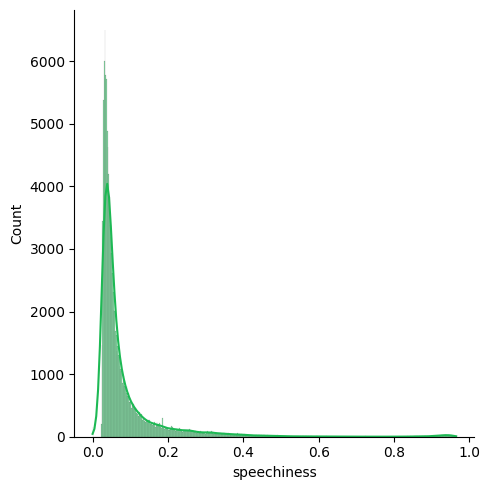

Kurtosis of speechiness: 28.82408944779552 leptokurtic
Skew of speechiness: 4.647492918523728 (highly skewed)
Probability that speechiness is normally distributed: 0.0



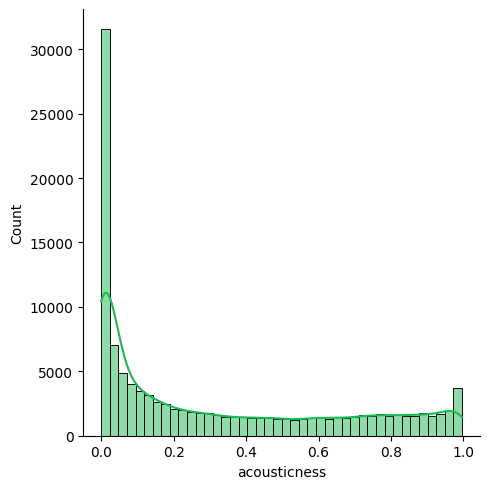

Kurtosis of acousticness: -0.9498889182027619 
Skew of acousticness: 0.7273209423562997 (moderately skewed)
Probability that acousticness is normally distributed: 0.0



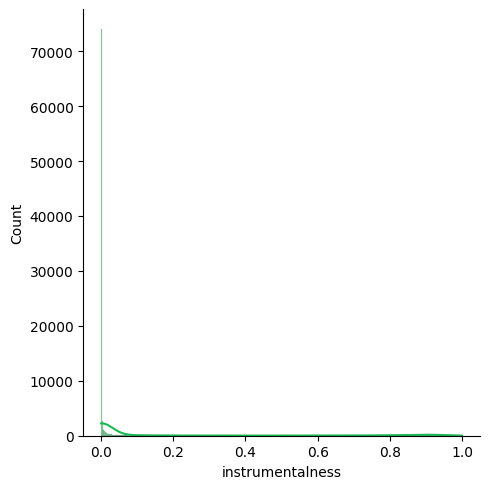

Kurtosis of instrumentalness: 1.2706972909035907 
Skew of instrumentalness: 1.7343922054405987 (highly skewed)
Probability that instrumentalness is normally distributed: 0.0



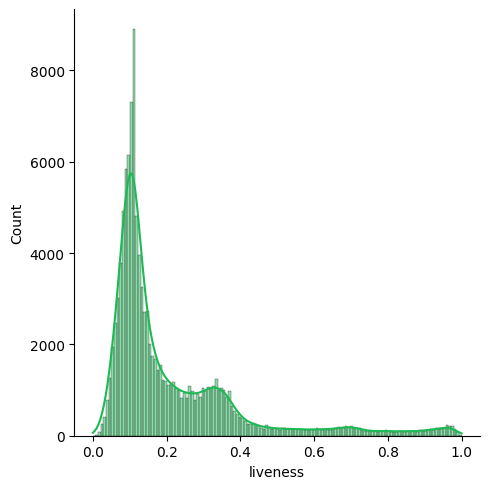

Kurtosis of liveness: 4.37821602893475 leptokurtic
Skew of liveness: 2.105727830403497 (highly skewed)
Probability that liveness is normally distributed: 0.0



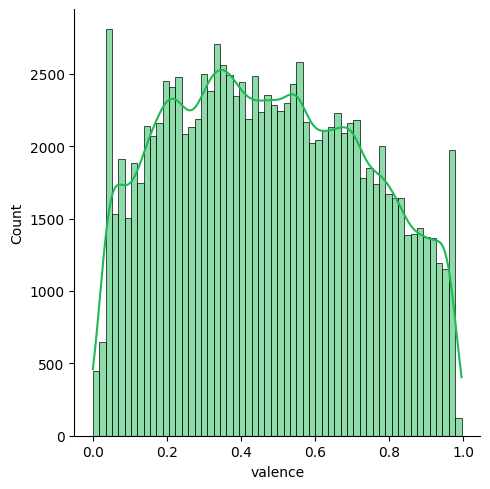

Kurtosis of valence: -1.0274170661711575 
Skew of valence: 0.11509660346855191 (approximately symmetric)
Probability that valence is normally distributed: 0.0



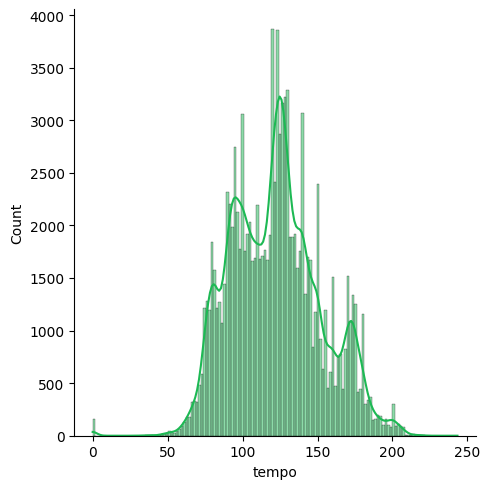

Kurtosis of tempo: -0.10858741818843676 
Skew of tempo: 0.2323076027651263 (approximately symmetric)
Probability that tempo is normally distributed: 3.107162298081056e-231



In [22]:
skews = {}
for num_feat in numerical_features:
    sns.displot(spotify_df[num_feat], color=spotify_dark_green, kde=True)
    plt.show()
    kurt = spotify_df[num_feat].kurtosis()
    kurt_inf = ""
    # http://brownmath.com/stat/shape.htm#Kurt_Infer
    if kurt > 3:
        kurt_inf = "leptokurtic"
    if kurt < -3:
        kurt_inf = "playkurtic"

    print(f"Kurtosis of {num_feat}: {kurt} {kurt_inf}")

    # http://brownmath.com/stat/shape.htm#SkewnessInterpret
    skew = spotify_df[num_feat].skew()
    skew_shape = ""
    if skew > 1.0 or skew < -1.0:
        skew_shape = "highly skewed"
    if (skew < 1.0 and skew > 0.5) or (skew > -1.0 and skew < -0.5):
        skew_shape = "moderately skewed"
    if skew > -0.5 and skew < 0.5:
        skew_shape = "approximately symmetric"
    print(f"Skew of {num_feat}: {spotify_df[num_feat].skew()} ({skew_shape})")

    num_feat_non_zero = np.where(
        spotify_df[num_feat] == 0, 0.00000000000000001, spotify_df[num_feat]
    )
    stat, p = normaltest(num_feat_non_zero)
    print(f"Probability that {num_feat} is normally distributed: {p}\n")
    skews[num_feat] = skew

/home/jared/.cache/pypoetry/virtualenvs/data-explorations-yiltwoYm-py3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/jared/.cache/pypoetry/virtualenvs/data-explorations-yiltwoYm-py3.12/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


duration_ms original skewness: 11.195825995953086
logarithmic: -0.3183004138141256
reciprocal:  5.034981271049094
square-root: 1.8342491769162217
Yeo-Johnson: 0.05560357229788245
Box cox: 0.05560354669518491


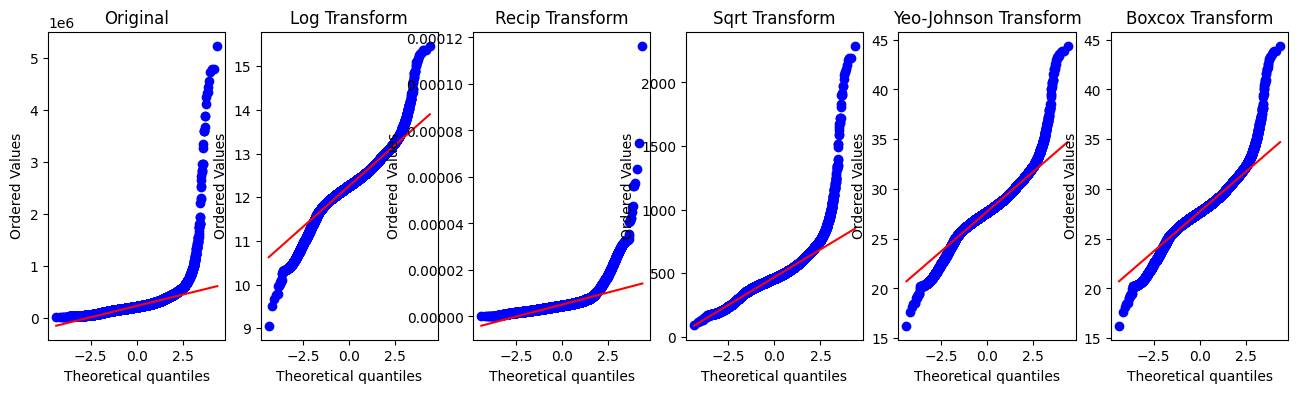

danceability original skewness: -0.3995051370129279
logarithmic: -0.702023735714335
reciprocal:  1.0404944859876408
square-root: -1.0758476008697382
Yeo-Johnson: -0.04407895667771712
Box cox: -0.0440789351060666


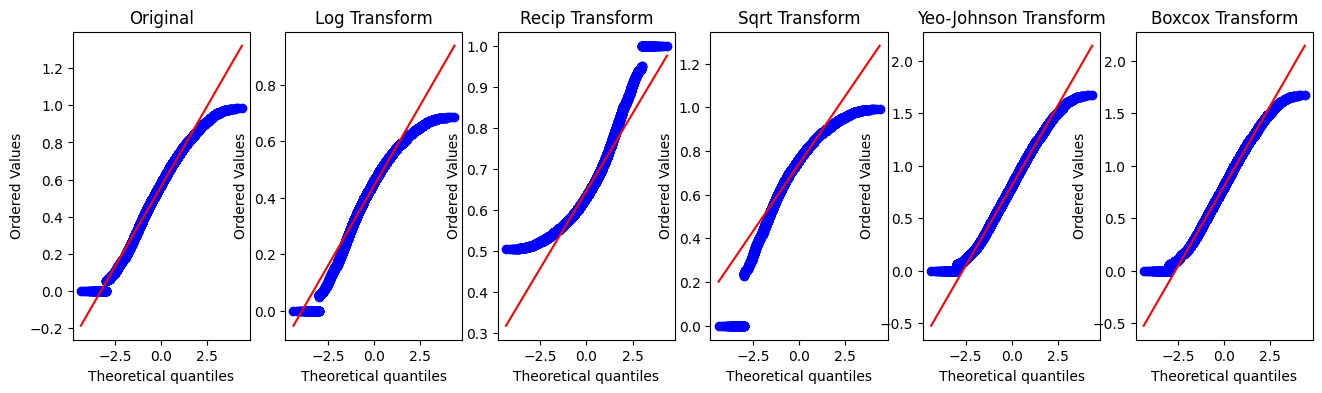

energy original skewness: -0.5970052205033176
logarithmic: -0.8946668388998825
reciprocal:  1.2314841831050005
square-root: -1.2661018887773619
Yeo-Johnson: -0.1677592310549429
Box cox: -0.16775925255145532


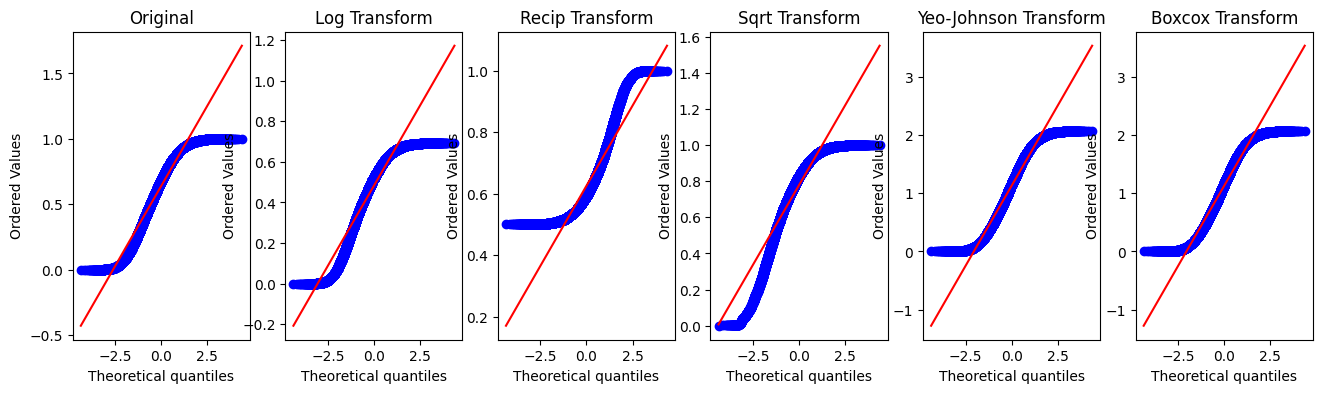

loudness original skewness: -2.0065408040630155
logarithmic: -0.932544560371331
reciprocal:  44.373867313262984
square-root: 0.7167367809512313
Yeo-Johnson: 0.14484088701959333


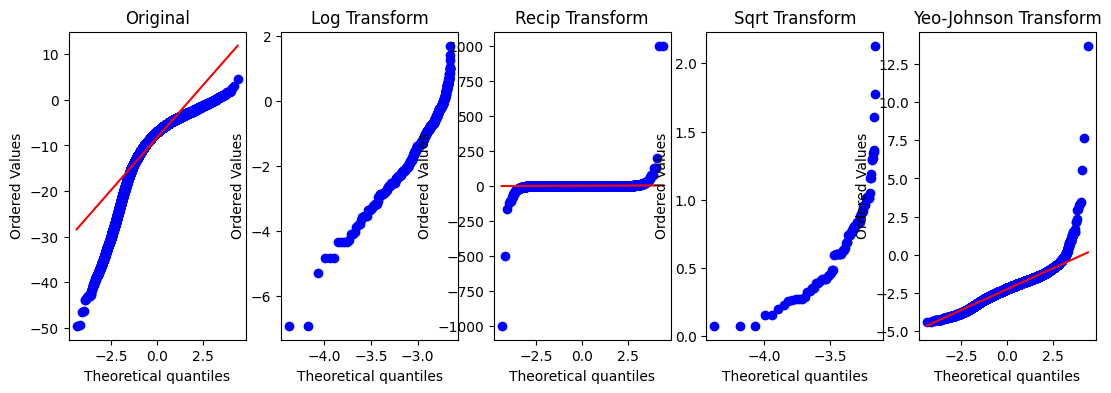

speechiness original skewness: 4.647492918523728
logarithmic: 3.711849786160607
reciprocal:  -3.020795856830025
square-root: 2.512321973682678
Yeo-Johnson: 0.670262481705992
Box cox: 0.6702624673082068


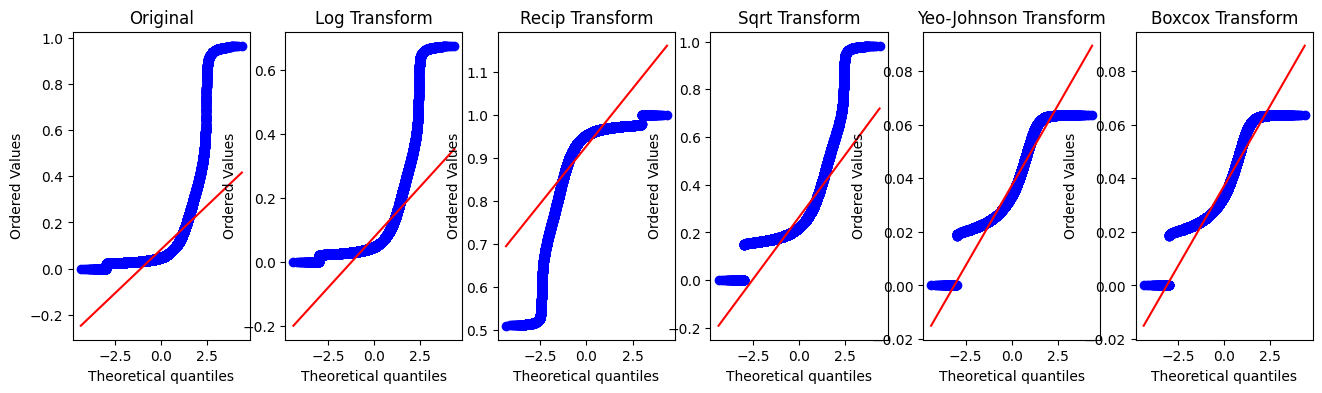

acousticness original skewness: 0.7273209423562997
logarithmic: 0.5507687001794995
reciprocal:  -0.38673852924336377
square-root: 0.190172699124013
Yeo-Johnson: 0.2494678155608849
Box cox: 0.24946783078617404


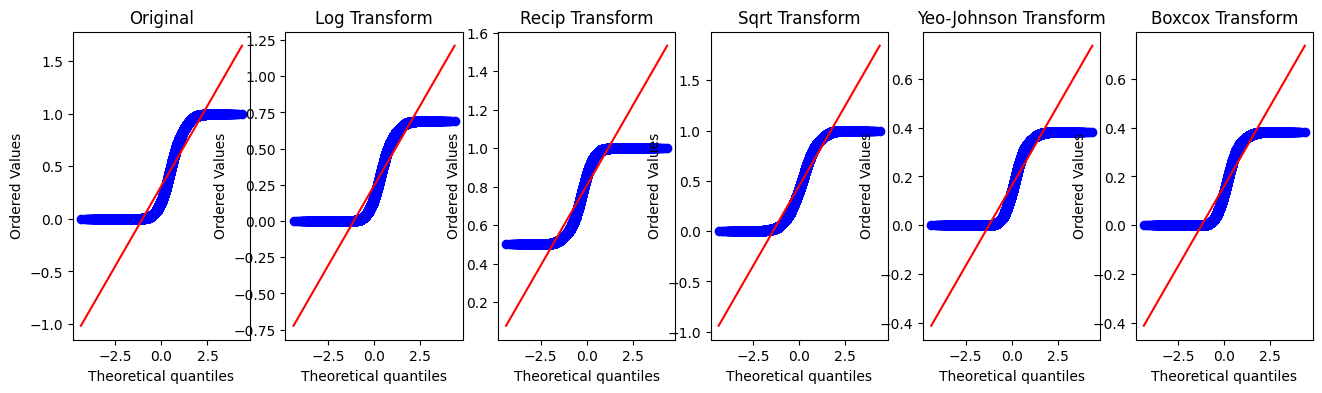

instrumentalness original skewness: 1.7343922054405987
logarithmic: 1.6515829458424727
reciprocal:  -1.5755569874203992
square-root: 1.4440610933164344
Yeo-Johnson: 1.2646334483331758
Box cox: 1.2646334489678939


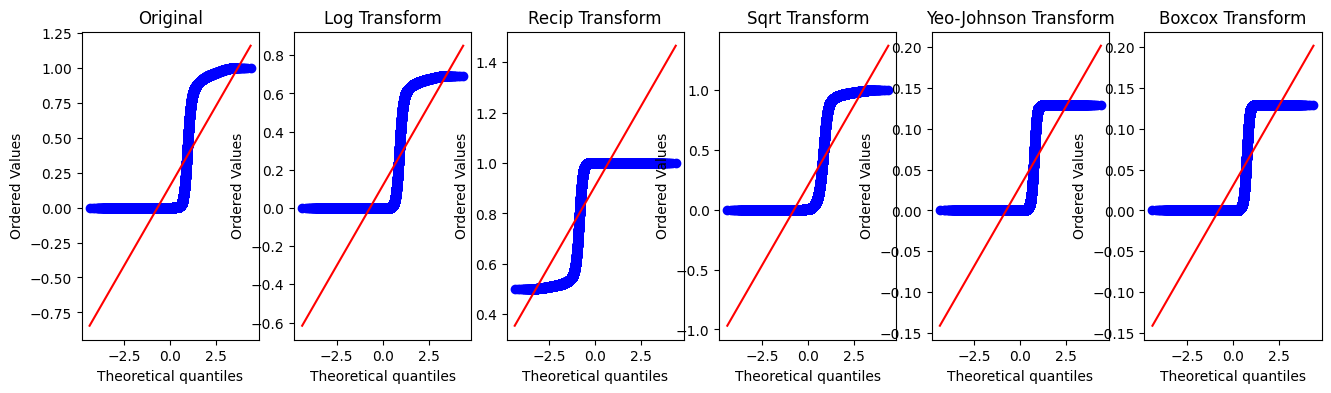

liveness original skewness: 2.105727830403497
logarithmic: 1.7358391633656085
reciprocal:  -1.4097870329043574
square-root: 1.3314166844920614
Yeo-Johnson: 0.3701101812899448
Box cox: 0.37011013962836126


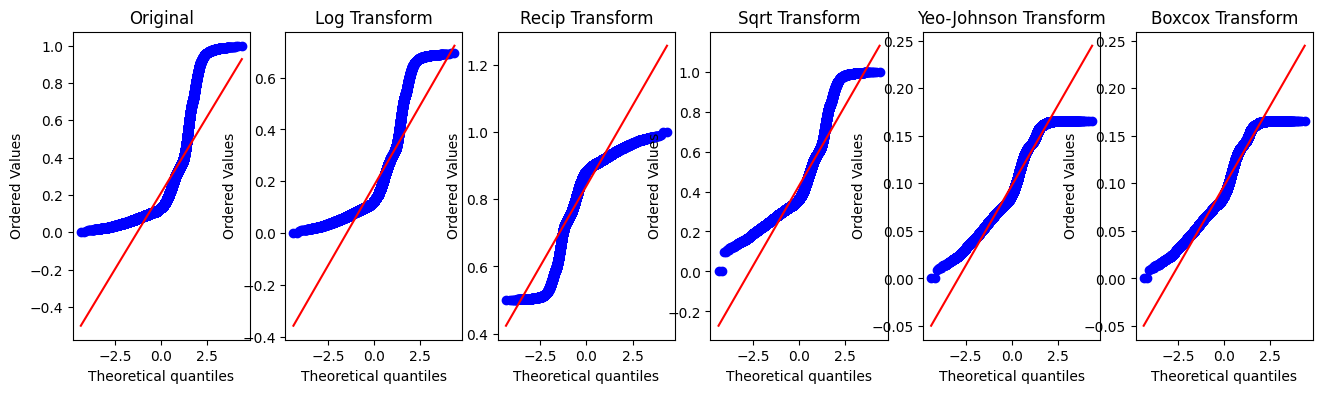

valence original skewness: 0.11509660346855191
logarithmic: -0.14232476932352384
reciprocal:  0.4052368271577066
square-root: -0.4680088995860629
Yeo-Johnson: -0.027324110780266517
Box cox: -0.027324114023623187


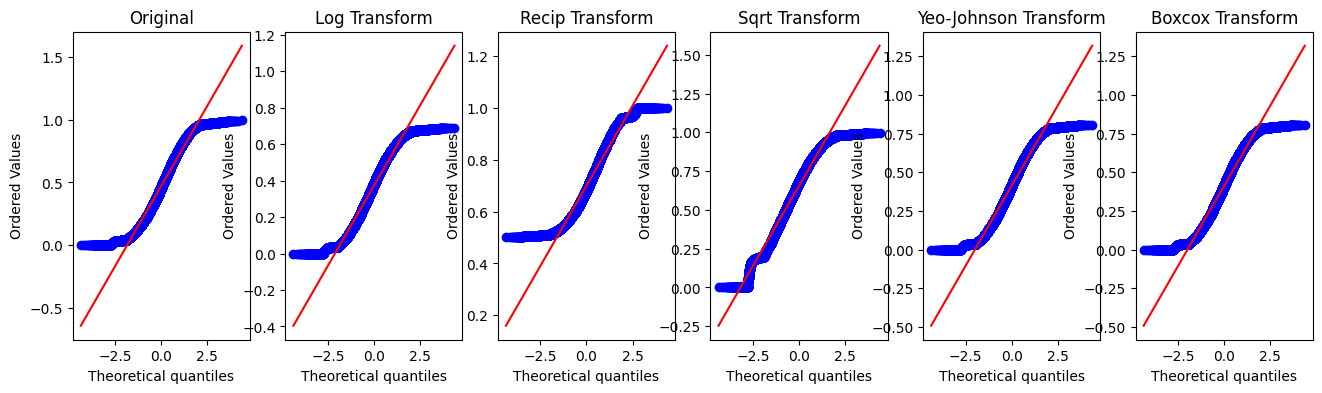

tempo original skewness: 0.2323076027651263
logarithmic: -5.487355986476579
reciprocal:  26.746703031950005
square-root: -0.5903588383170648
Yeo-Johnson: 0.06344583947497082
Box cox: 0.06344587984149776


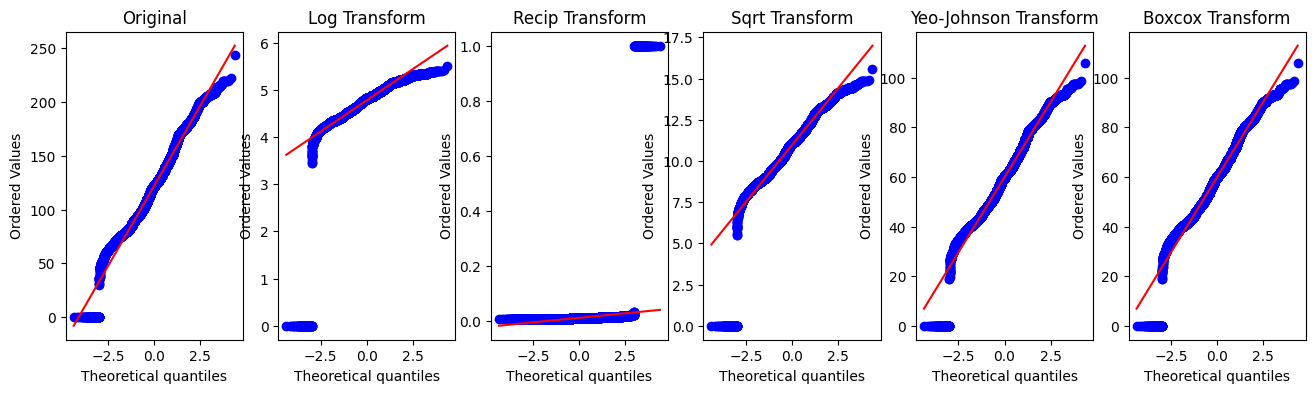

In [23]:
# https://www.kaggle.com/code/arnabdutta6/spotify-popularity-prediction-analysis-modelling/notebook
# https://parisrohan.medium.com/feature-transformation-techniques-using-python-fcf36e872bb3
dataset_log = spotify_df.copy()
dataset_reci = spotify_df.copy()
dataset_sqrt = spotify_df.copy()
dataset_expo = spotify_df.copy()
dataset_boxcox = spotify_df.copy()

for num_feat in numerical_features:
    dataset_log[num_feat] = np.log(dataset_log[num_feat] + 1)
    dataset_reci[num_feat] = 1 / (dataset_reci[num_feat] + 1)
    dataset_sqrt[num_feat] = np.sqrt(dataset_sqrt[num_feat])
    dataset_expo[num_feat], lmbda = scp.stats.yeojohnson(dataset_expo[num_feat])
    if num_feat != "loudness":
        dataset_boxcox[num_feat], p = scp.stats.boxcox(dataset_boxcox[num_feat] + 1)


for num_feat in numerical_features:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 6, 1)
    ax = plt.subplot(1, 6, 1)
    print(f"{num_feat} original skewness: {skews[num_feat]}")
    scp.stats.probplot(spotify_df[num_feat], dist="norm", plot=plt)
    ax.set_title("Original")

    plt.subplot(1, 6, 2)
    ax = plt.subplot(1, 6, 2)
    print("logarithmic:", dataset_log[num_feat].skew())
    scp.stats.probplot(dataset_log[num_feat], dist="norm", plot=plt)
    ax.set_title("Log Transform")

    plt.subplot(1, 6, 3)
    ax = plt.subplot(1, 6, 3)
    print("reciprocal: ", dataset_reci[num_feat].skew())
    scp.stats.probplot(dataset_reci[num_feat], dist="norm", plot=plt)
    ax.set_title("Recip Transform")

    plt.subplot(1, 6, 4)
    ax = plt.subplot(1, 6, 4)
    print("square-root:", dataset_sqrt[num_feat].skew())
    scp.stats.probplot(dataset_sqrt[num_feat], dist="norm", plot=plt)
    ax.set_title("Sqrt Transform")

    plt.subplot(1, 6, 5)
    ax = plt.subplot(1, 6, 5)
    print("Yeo-Johnson:", dataset_expo[num_feat].skew())
    scp.stats.probplot(dataset_expo[num_feat], dist="norm", plot=plt)
    ax.set_title("Yeo-Johnson Transform")

    if num_feat != "loudness":
        plt.subplot(1, 6, 6)
        ax = plt.subplot(1, 6, 6)
        print("Box cox:", dataset_boxcox[num_feat].skew())
        scp.stats.probplot(dataset_boxcox[num_feat], dist="norm", plot=plt)
        ax.set_title("Boxcox Transform")

    plt.show()

In [24]:
sqrt_tranforms = ["acousticness"]
yeojohnson_transforms = [
    "loudness",
    "tempo",
    "valence",
    "liveness",
    "speechiness",
    "energy",
    "danceability",
    "duration_ms",
]

<Axes: >

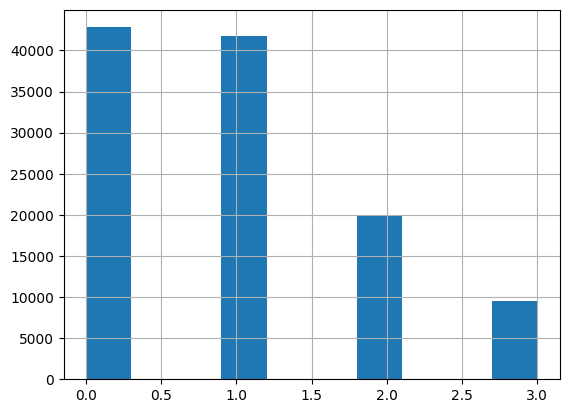

In [25]:
spotify_df["pop"] = 0.0
bins = [25.0, 50.0, 65.0]
for i, bin in enumerate(bins):
    spotify_df["pop"] = np.where(
        spotify_df["popularity"] >= bin, i + 1, spotify_df["pop"]
    )
spotify_df["pop"].hist()

<Axes: >

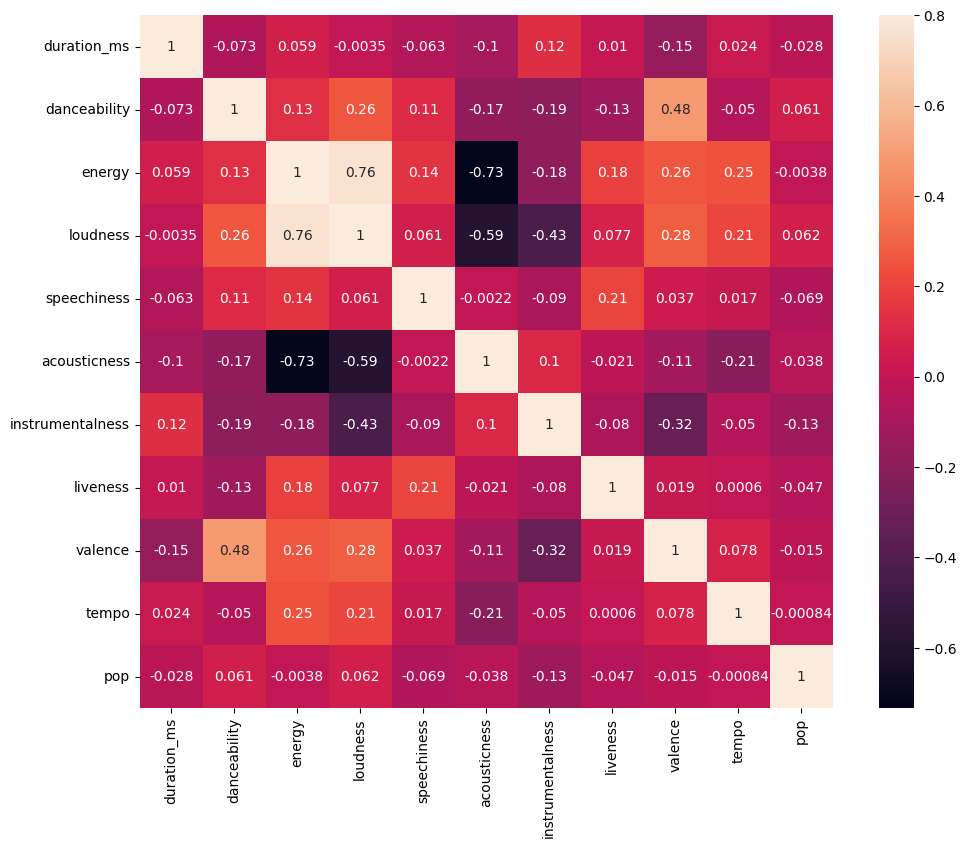

In [26]:
pop_corr = spotify_df[numerical_features + ["pop"]].corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(pop_corr, vmax=0.8, square=True, annot=True)

In [27]:
corr_pop = pop_corr["pop"][1:-1].abs().mean()
corr_popularity = corrmat["popularity"][1:-1].abs().mean()
print((corr_pop - corr_popularity) / corr_popularity)

0.36335496967220576


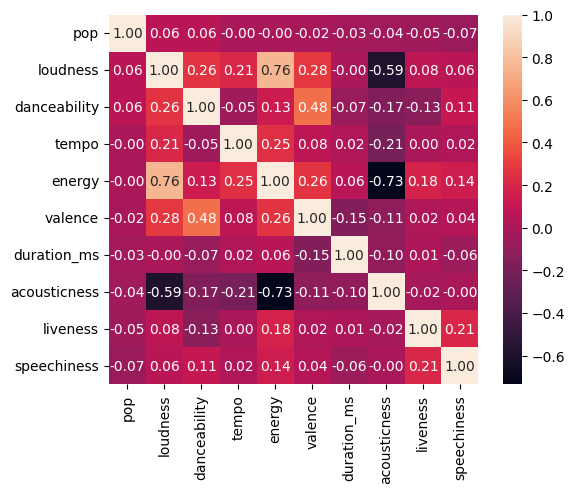

In [28]:
k = 10  # number of variables for heatmap
cols = pop_corr.nlargest(k, "pop")["pop"].index
cm = spotify_df[cols].corr(numeric_only=False)
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt=".2f",
    annot_kws={"size": 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

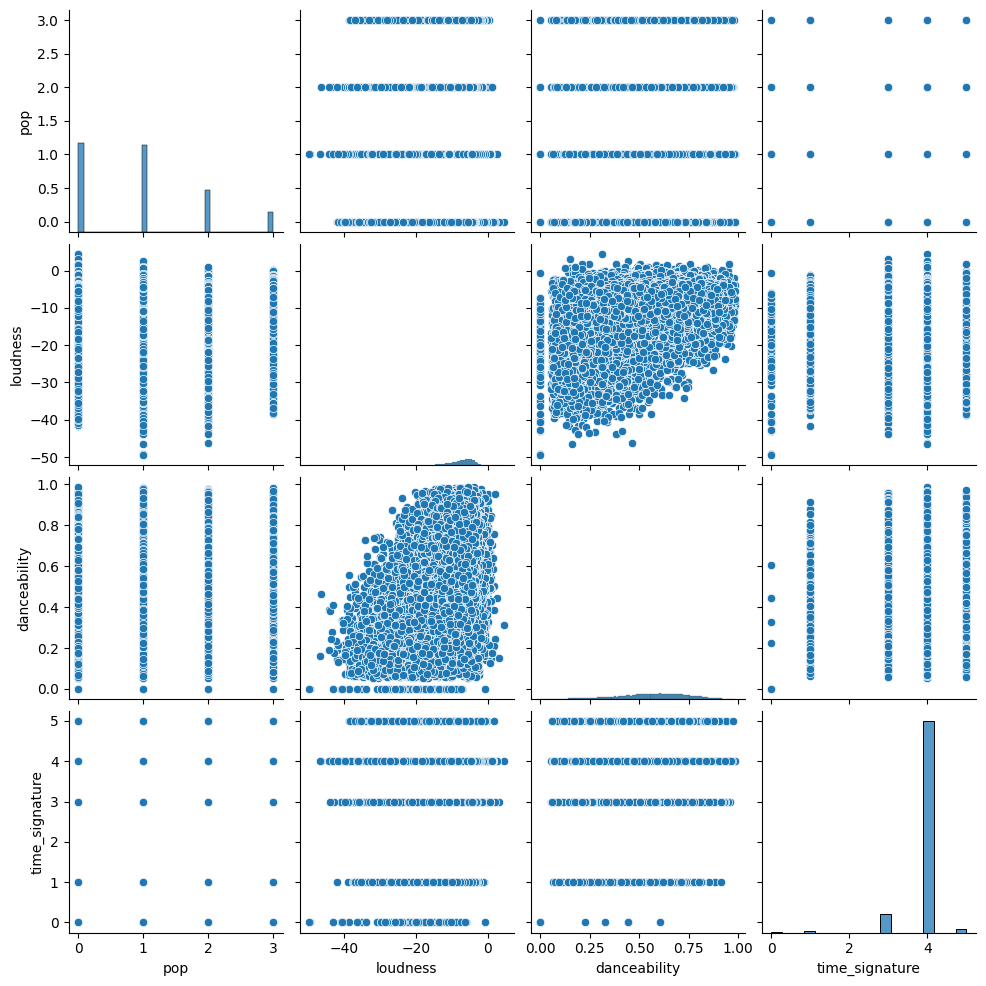

In [29]:
scatter_cols = ["pop", "loudness", "danceability", "time_signature"]
sns.pairplot(spotify_df[scatter_cols])
plt.show()

In [30]:
spotify_df.drop(columns=["pop"], inplace=True)

In [31]:
spotify_train, spotify_test = train_test_split(
    spotify_df, test_size=0.2, train_size=0.8, random_state=811, shuffle=True
)

# valuable_cols = ["loudness", "explicit", "danceability", "time_signature", "tempo"] + ["track_genre"]

spotify_test.to_csv("../data/spotify_test.csv")
spotify_train.to_csv("../data/spotify_train.csv")

spotify_train_X = spotify_train.drop(
    columns=["popularity", "loudness"] + suspect_categorical_features
)
spotify_train_y = spotify_train["popularity"]

spotify_train_X.head()

,artists,duration_ms,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
22842,At The Gates,230746,False,0.395,0.901,0,1,0.0391,0.000004,0.87900,0.0615,0.357,90.510,4,death-metal
98412,"Original (German) Cast of ""Tanz Der Vampire""",104266,False,0.497,0.233,0,0,0.0710,0.726000,0.00000,0.1590,0.365,89.302,4,show-tunes
18095,Ron White,322322,True,0.577,0.430,3,0,0.9410,0.955000,0.00000,0.3200,0.235,100.561,3,comedy
52775,Faron Young,117000,False,0.389,0.203,4,1,0.0296,0.928000,0.00265,0.2320,0.408,106.232,4,honky-tonk
16951,Wolfgang Amadeus Mozart;Ingrid Haebler,397013,False,0.370,0.091,10,1,0.0476,0.995000,0.92900,0.1440,0.600,135.595,3,classical


array([[<Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

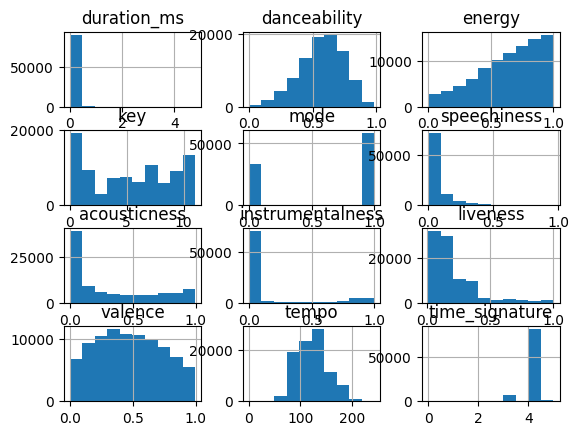

In [32]:
spotify_train_X.hist()

In [33]:
numerical_cols = [
    feat for feat in numerical_features if feat not in yeojohnson_transforms
]
print(numerical_cols)

['acousticness', 'instrumentalness']


In [30]:
num_cols = [
    "loudness",
    "danceability",
    "time_signature",
    "tempo",
    "duration_ms",
    "energy",
    "key",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
]
categorical_cols = ["track_genre", "artists"]

# num_cols = [item for item in num_cols if item not in discretization_cols]
yeo_steps = Pipeline(
    steps=[("yeo", PowerTransformer(method="yeo-johnson")), ("num", StandardScaler())]
)
non_transforms = Pipeline(steps=[("num", StandardScaler())])
# print(numerical_features)
numerical_features = [
    "duration_ms",
    "danceability",
    "energy",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]
pipeline = ColumnTransformer(
    [
        ("num", yeo_steps, numerical_features),
        ("cat", ce.BaseNEncoder(base=10), ["artists"]),
        ("genre", OneHotEncoder(), ["track_genre"]),
    ]
)

spotify_train_X_prepared = pipeline.fit_transform(spotify_train_X)
# print(spotify_train_X_prepared.shape)
# test_df = pd.DataFrame(spotify_train_X_prepared.toarray())
# test_df.hist(figsize=(12, 9))
# plt.show()

In [34]:
lin_reg = LinearRegression()
lin_reg.fit(spotify_train_X_prepared, spotify_train_y)
pred = lin_reg.predict(spotify_train_X_prepared)
lin_mse = mean_squared_error(spotify_train_y, pred)
print(np.sqrt(lin_mse))

19.169200337694754


In [35]:
tree_reg = DecisionTreeRegressor(max_depth=100, ccp_alpha=0.1)
tree_reg.fit(spotify_train_X_prepared, spotify_train_y)
pred = tree_reg.predict(spotify_train_X_prepared)
lin_mse = mean_squared_error(spotify_train_y, pred)
print(np.sqrt(lin_mse))
print(tree_reg.get_depth())

17.706454482115678
58


In [36]:
scores = cross_val_score(
    tree_reg,
    spotify_train_X_prepared,
    spotify_train_y,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-2,
)
print(np.sqrt(-scores))

[19.28067952 19.61725459 18.96780203 18.86909952 18.69471618 18.36987325
 18.83899332 18.61141456 18.70286112 18.98918357]


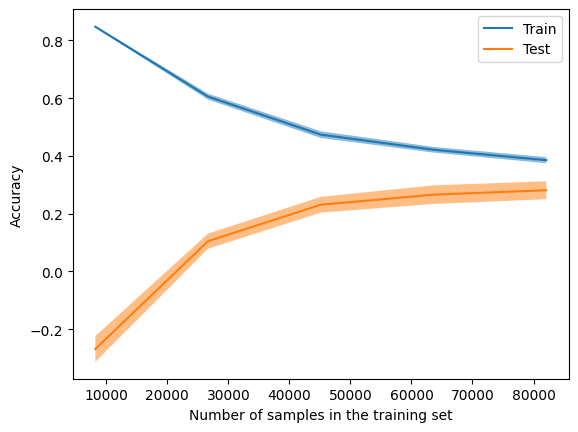

In [194]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py
lc = LearningCurveDisplay.from_estimator(
    estimator=tree_reg,
    X=spotify_train_X_prepared,
    y=spotify_train_y,
    cv=10,
    n_jobs=-2,
    score_name="Accuracy",
)
plt.show()

In [ ]:
param_grid = {
    "criterion": ["squared_error"],
    "splitter": ["best", "random"],
    "max_depth": np.linspace(75, 150, 5, dtype=int),
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.linspace(1, 100, 5, dtype=int),
    "ccp_alpha": np.linspace(0.1, 0.3, 5),
}
search = GridSearchCV(
    estimator=tree_reg,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=10,
    n_jobs=-2,
)
search.fit(spotify_train_X_prepared, spotify_train_y)
results = pd.DataFrame(search.cv_results_)
results = results.sort_values(by=["rank_test_score"])
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
174,8.178861,0.377922,0.002736,0.000287,0.1,squared_error,150,25,8,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
130,8.175017,0.272957,0.002847,0.000177,0.1,squared_error,131,25,4,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
48,7.690192,0.231917,0.002743,0.000107,0.1,squared_error,93,25,2,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
128,8.448594,0.620644,0.003140,0.000626,0.1,squared_error,131,25,2,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
168,7.721719,0.401454,0.002731,0.000126,0.1,squared_error,150,25,2,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
50,7.891121,0.207690,0.002740,0.000179,0.1,squared_error,93,25,4,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
170,7.884246,0.321591,0.002811,0.000201,0.1,squared_error,150,25,4,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
52,8.067984,0.292482,0.004070,0.002621,0.1,squared_error,93,25,6,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
54,8.125767,0.203090,0.002875,0.000320,0.1,squared_error,93,25,8,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1
172,7.826711,0.224994,0.002673,0.000235,0.1,squared_error,150,25,6,best,...,-18.982252,-18.981067,-18.455522,-18.877339,-18.723606,-18.737026,-19.035304,-18.842603,0.260877,1


In [ ]:
results.head(30)
results.to_csv("../data/spotify_dt_gridsearch.csv")

NameError: name 'results' is not defined

In [204]:
forest_reg = RandomForestRegressor(n_jobs=-2, n_estimators=50)
forest_reg.fit(spotify_train_X_prepared, spotify_train_y)

RandomForestRegressor(n_estimators=50, n_jobs=-2)

In [205]:
scores = cross_val_score(
    forest_reg,
    spotify_train_X_prepared,
    spotify_train_y,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-2,
)
print(np.sqrt(-scores))

[15.54932294 15.7104047  15.27639898 15.59821442 15.46433776 15.19556373
 15.52436709 15.29263244 15.19216623 15.62231455]


In [ ]:
lc = LearningCurveDisplay.from_estimator(
    estimator=forest_reg,
    X=spotify_train_X_prepared,
    y=spotify_train_y,
    cv=10,
    n_jobs=-2,
    score_name="Accuracy",
)
plt.show()

In [ ]:
gbdt_reg = HistGradientBoostingRegressor()
gbdt_reg.fit(spotify_train_X_prepared.toarray(), spotify_train_y)

HistGradientBoostingRegressor()

In [ ]:
scores = cross_val_score(
    gbdt_reg,
    spotify_train_X_prepared.toarray(),
    spotify_train_y,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-2,
)
print(np.sqrt(-scores))

[18.17895922 18.89331068 18.48472732 18.59257388 18.67186958 18.13578072
 18.42819547 18.35525264 18.34332613 18.55452013]


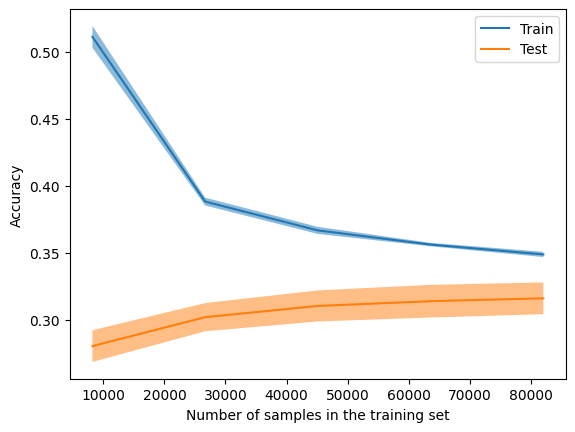

In [ ]:
lc = LearningCurveDisplay.from_estimator(
    estimator=gbdt_reg,
    X=spotify_train_X_prepared.toarray(),
    y=spotify_train_y,
    cv=10,
    n_jobs=-2,
    score_name="Accuracy",
)
plt.show()

In [ ]:
ada_reg = AdaBoostRegressor(n_estimators=100, loss="exponential")
ada_reg.fit(spotify_train_X_prepared, spotify_train_y)

AdaBoostRegressor(loss='exponential', n_estimators=100)

In [ ]:
scores = cross_val_score(
    ada_reg,
    spotify_train_X_prepared,
    spotify_train_y,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-2,
)
print(np.sqrt(-scores))

[22.4232243  22.68019019 22.57513701 22.6519767  22.51855666 22.47017204
 22.53691288 22.4533551  22.55245239 22.58090795]


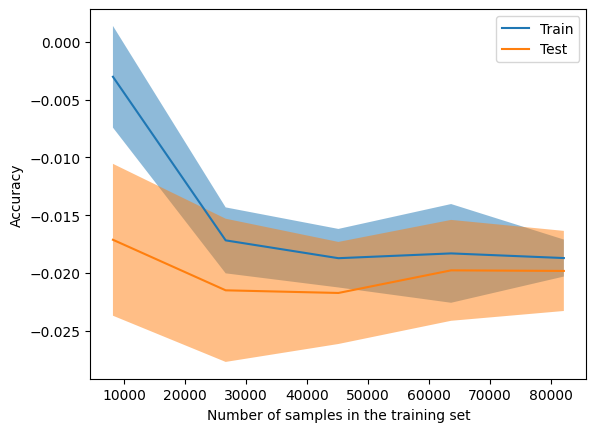

In [ ]:
lc = LearningCurveDisplay.from_estimator(
    estimator=ada_reg,
    X=spotify_train_X_prepared,
    y=spotify_train_y,
    cv=10,
    score_name="Accuracy",
    n_jobs=-2,
)
plt.show()

In [ ]:
kn_reg = KNeighborsRegressor(n_jobs=-2)
kn_reg.fit(spotify_train_X_prepared, spotify_train_y)

KNeighborsRegressor(n_jobs=-2)

In [ ]:
scores = cross_val_score(
    kn_reg,
    spotify_train_X_prepared,
    spotify_train_y,
    scoring="neg_mean_squared_error",
    cv=10,
    n_jobs=-2,
)
print(np.sqrt(-scores))

[18.98048178 19.52795028 19.59943407 19.51316447 19.24327759 19.36941736
 19.41170089 19.26911855 19.47310133 19.90369323]


In [37]:
spotify_class_train, spotify_class_test = train_test_split(
    spotify_df, test_size=0.2, train_size=0.8, random_state=811, shuffle=True
)

# valuable_cols = ["loudness", "explicit", "danceability", "time_signature", "tempo"] + ["track_genre"]

spotify_class_test.to_csv("../data/spotify_class_test.csv")
spotify_class_train.to_csv("../data/spotify_class_train.csv")

spotify_class_train_X = spotify_class_train.drop(
    columns=["popularity", "loudness"] + suspect_categorical_features
)
spotify_class_train_y = pd.DataFrame(spotify_class_train["popularity"])

spotify_class_train_X.head()

,artists,duration_ms,explicit,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
22842,At The Gates,230746,False,0.395,0.901,0,1,0.0391,0.000004,0.87900,0.0615,0.357,90.510,4,death-metal
98412,"Original (German) Cast of ""Tanz Der Vampire""",104266,False,0.497,0.233,0,0,0.0710,0.726000,0.00000,0.1590,0.365,89.302,4,show-tunes
18095,Ron White,322322,True,0.577,0.430,3,0,0.9410,0.955000,0.00000,0.3200,0.235,100.561,3,comedy
52775,Faron Young,117000,False,0.389,0.203,4,1,0.0296,0.928000,0.00265,0.2320,0.408,106.232,4,honky-tonk
16951,Wolfgang Amadeus Mozart;Ingrid Haebler,397013,False,0.370,0.091,10,1,0.0476,0.995000,0.92900,0.1440,0.600,135.595,3,classical


In [38]:
# num_cols = [item for item in num_cols if item not in discretization_cols]
yeo_steps = Pipeline(
    steps=[("yeo", PowerTransformer(method="yeo-johnson")), ("num", StandardScaler())]
)
non_transforms = Pipeline(steps=[("num", StandardScaler())])
# print(numerical_features)
numerical_features = [
    "duration_ms",
    "danceability",
    "energy",
    "speechiness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
]
pipeline = ColumnTransformer(
    [
        ("num", yeo_steps, numerical_features),
        ("cat", ce.BaseNEncoder(base=10), ["artists"]),
        ("genre", OneHotEncoder(), ["track_genre"]),
    ]
)
spotify_class_train_X_prepared = pipeline.fit_transform(spotify_class_train_X)

In [39]:
spotify_class_train_y.head()

,popularity
22842,21
98412,25
18095,27
52775,12
16951,4


In [40]:
spotify_class_train_y.describe()

,popularity
count,91199.000000
mean,33.202195
std,22.311077
min,0.000000
25%,17.000000
50%,34.000000
75%,50.000000
max,100.000000


<Axes: >

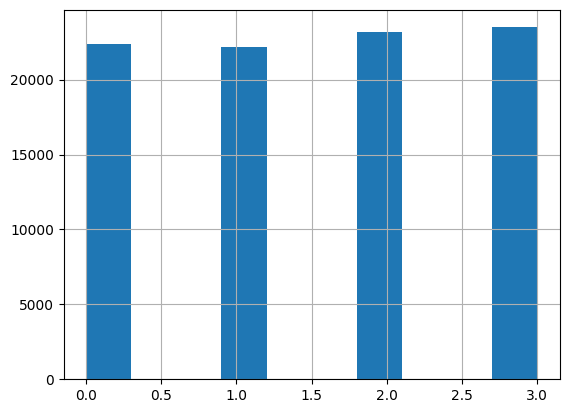

In [41]:
spotify_class_train_y["pop"] = 0.0
bins = [17.0, 34.0, 50.0]
for i, bin in enumerate(bins):
    spotify_class_train_y["pop"] = np.where(
        spotify_class_train_y["popularity"] >= bin, i + 1, spotify_class_train_y["pop"]
    )
spotify_class_train_y["pop"].hist()

In [42]:
spotify_class_train_y.drop(columns=["popularity"], inplace=True)
spotify_class_train_y.head()

,pop
22842,1.0
98412,1.0
18095,1.0
52775,0.0
16951,0.0


In [43]:
spotify_class_train_y = spotify_class_train_y.values.ravel()

In [57]:
tree_clf = DecisionTreeClassifier(
    max_depth=125, criterion="gini", min_samples_leaf=4, splitter="random"
)
tree_clf.fit(spotify_class_train_X_prepared, spotify_class_train_y)

DecisionTreeClassifier()

In [70]:
tree_clf.get_depth()

130

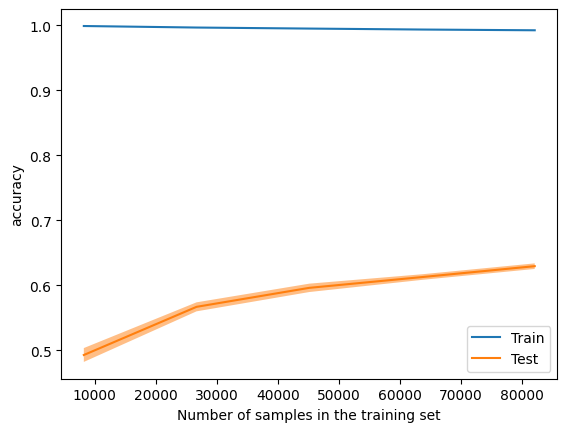

In [69]:
lc = LearningCurveDisplay.from_estimator(
    estimator=tree_clf,
    X=spotify_class_train_X_prepared,
    y=spotify_class_train_y,
    cv=10,
    n_jobs=-3,
    score_name="accuracy",
)
plt.show()

In [75]:
param_grid = {
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "max_depth": np.linspace(25, 150, 5, dtype=int),
    "min_samples_split": np.arange(2, 10, 2),
    "min_samples_leaf": np.linspace(1, 100, 5, dtype=int),
}
search = GridSearchCV(
    estimator=tree_clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=10,
    n_jobs=-3,
    verbose=1,
)
search.fit(spotify_class_train_X_prepared, spotify_class_train_y)
results = pd.DataFrame(search.cv_results_)
results = results.sort_values(by=["rank_test_score"])
results.head(10)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
333,3.442571,0.162726,0.004262,0.000281,gini,118,25,6,random,"{'criterion': 'gini', 'max_depth': 118, 'min_s...",...,0.643969,0.653947,0.656250,0.652193,0.661842,0.655154,0.645575,0.650259,0.007032,1
335,3.356682,0.160943,0.004313,0.000227,gini,118,25,8,random,"{'criterion': 'gini', 'max_depth': 118, 'min_s...",...,0.657566,0.651425,0.653728,0.656250,0.656140,0.655811,0.646343,0.650193,0.008253,2
329,3.455946,0.192750,0.004459,0.000416,gini,118,25,2,random,"{'criterion': 'gini', 'max_depth': 118, 'min_s...",...,0.656031,0.653838,0.647259,0.657346,0.656689,0.649561,0.651278,0.649788,0.007141,3
373,3.434999,0.064103,0.004199,0.000283,gini,150,25,6,random,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",...,0.649232,0.654276,0.654496,0.649890,0.657346,0.651316,0.650510,0.649689,0.006146,4
375,3.492065,0.161874,0.004297,0.000375,gini,150,25,8,random,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",...,0.657346,0.645614,0.652303,0.655702,0.645066,0.659101,0.648865,0.648319,0.007236,5
331,3.579744,0.185249,0.004424,0.000466,gini,118,25,4,random,"{'criterion': 'gini', 'max_depth': 118, 'min_s...",...,0.650658,0.658114,0.653070,0.653399,0.649781,0.653070,0.638557,0.648198,0.008006,6
369,3.808294,0.144185,0.005116,0.001505,gini,150,25,2,random,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",...,0.656798,0.658553,0.656689,0.649013,0.644298,0.654057,0.643492,0.648033,0.008651,7
371,3.445323,0.185351,0.004268,0.000289,gini,150,25,4,random,"{'criterion': 'gini', 'max_depth': 150, 'min_s...",...,0.643092,0.646930,0.649452,0.650877,0.655482,0.650219,0.646343,0.647891,0.004697,8
133,3.425163,0.164719,0.004291,0.000250,entropy,118,25,6,random,"{'criterion': 'entropy', 'max_depth': 118, 'mi...",...,0.646930,0.640461,0.649013,0.647039,0.642654,0.658333,0.648317,0.645808,0.007264,9
175,3.447360,0.109789,0.004347,0.000220,entropy,150,25,8,random,"{'criterion': 'entropy', 'max_depth': 150, 'mi...",...,0.653180,0.653399,0.653947,0.644189,0.644408,0.650219,0.646343,0.645380,0.009303,10


In [81]:
forest_clf = RandomForestClassifier(
    n_jobs=-2, n_estimators=100, max_depth=100, criterion="gini"
)
forest_clf.fit(spotify_class_train_X_prepared, spotify_class_train_y)

RandomForestClassifier(max_depth=100, n_jobs=-2)

In [82]:
lc = LearningCurveDisplay.from_estimator(
    estimator=forest_clf,
    X=spotify_class_train_X_prepared,
    y=spotify_class_train_y,
    cv=5,
    n_jobs=4,
)
plt.show()